In [26]:
from deepscore import DeepScore
from preprocessing import *
import scanpy as sc
import anndata as ad
import tensorflow as tf
import os

%load_ext rpy2.ipython
%load_ext tensorboard
os.chdir("/home/pab/projects/kidney")
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')
sc.settings.set_figure_params(figsize=('10', '10'), color_map='gist_earth')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
%%R

library(Seurat)
library(Signac)
library(glue)
library(GenomicRanges)
set.seed(1234)
setwd("~/projects/kidney")
source("~/projects/utils/multiple_scataq_analysis.R")

In [13]:
%%R

sample_folders_files <- list(list("Multi", "kidney.multi.RData"),
                          list("Atac", "kidney.atac.RData"))
                
# Common set of peaks
peaks <- lapply(sample_folders_files, get_peaks_from_object, assay="peaks")
combpeaks <- reduce(c(peaks[[1]], peaks[[2]]))
combpeaks <- combpeaks[width(combpeaks) < 10000 & width(combpeaks) > 20]
length(combpeaks)

[1] 154136


In [15]:
%%R

library(future)
plan("multiprocess", workers = 1)
options(future.globals.maxSize = 10000 * 1024^2)

lapply(sample_folders_files, build_combined, combpeaks, drop_predictions = T)

R[write to console]: 
Attaching package: ‘future’


R[write to console]: The following object is masked from ‘package:GenomicRanges’:

    values


R[write to console]: The following object is masked from ‘package:IRanges’:

    values


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    values




Multi/kidney.multi.RData


R[write to console]: Computing hash

R[write to console]: Checking for 
R[write to console]: 3243
R[write to console]:  cell barcodes
R[write to console]: 

[W::hts_idx_load2] The index file is older than the data file: /home/pab/projects/kidney/Multi/atac_fragments.tsv.gz.tbi
R[write to console]: Error in h(simpleError(msg, call)) : 
  error in evaluating the argument 'y' in selecting a method for function 'intersect': [internal] bgzf_seek() failed

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'. 




Error in h(simpleError(msg, call)) : 
  error in evaluating the argument 'y' in selecting a method for function 'intersect': [internal] bgzf_seek() failed


RInterpreterError: Failed to parse and evaluate line '\nlibrary(future)\nplan("multiprocess", workers = 1)\noptions(future.globals.maxSize = 10000 * 1024^2)\n\nlapply(sample_folders_files, build_combined, combpeaks, drop_predictions = T)\n'.
R error message: "Error in h(simpleError(msg, call)) : \n  error in evaluating the argument 'y' in selecting a method for function 'intersect': [internal] bgzf_seek() failed"

In [16]:
# The reference object have empty count matrix, they're just published to show the metadata and the annotation
#!Rscript ../utils/seurat2anndata.R reference_rna_processed.rds # RNA reference
#!Rscript ../utils/seurat2anndata.R reference_atac_processed.rds # ATAC reference
!Rscript ../utils/seurat2anndata.R Multi/kidney.multi.RData RNA # Multiome RNA object
#!Rscript ../utils/seurat2anndata.R Multi/kidney.multi.RData peaks # Multiome ATAC object
#!Rscript ../utils/seurat2anndata.R Atac/kidney.atac.RData peaks # Single assay ATAC object
!Rscript ../utils/seurat2anndata.R Nuc/kidney.rna.RData RNA # Single assay RNA object

Attaching SeuratObject
Drop predictions is: TRUE
Selected assay is: RNA
[1] "Converting from RData to h5ad"
/home/pab/miniconda3/envs/csg.p/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'subcluster' as categorical
/home/pab/miniconda3/envs/csg.p/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'predicted.celltype' as categorical
/home/pab/miniconda3/envs/csg.p/lib/python3.9/site-packages/anndata/_core/anndata.py

### First load and process the sample we want to annotate:

### Now load and process the reference we will use to annotate:

AnnData object with n_obs × n_vars = 3760 × 20967
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'graph_res.0.8', 'seurat_clusters', 'predicted.id', 'predicted.celltype', 'subcluster', 'my_celltypes', 'dataset'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'


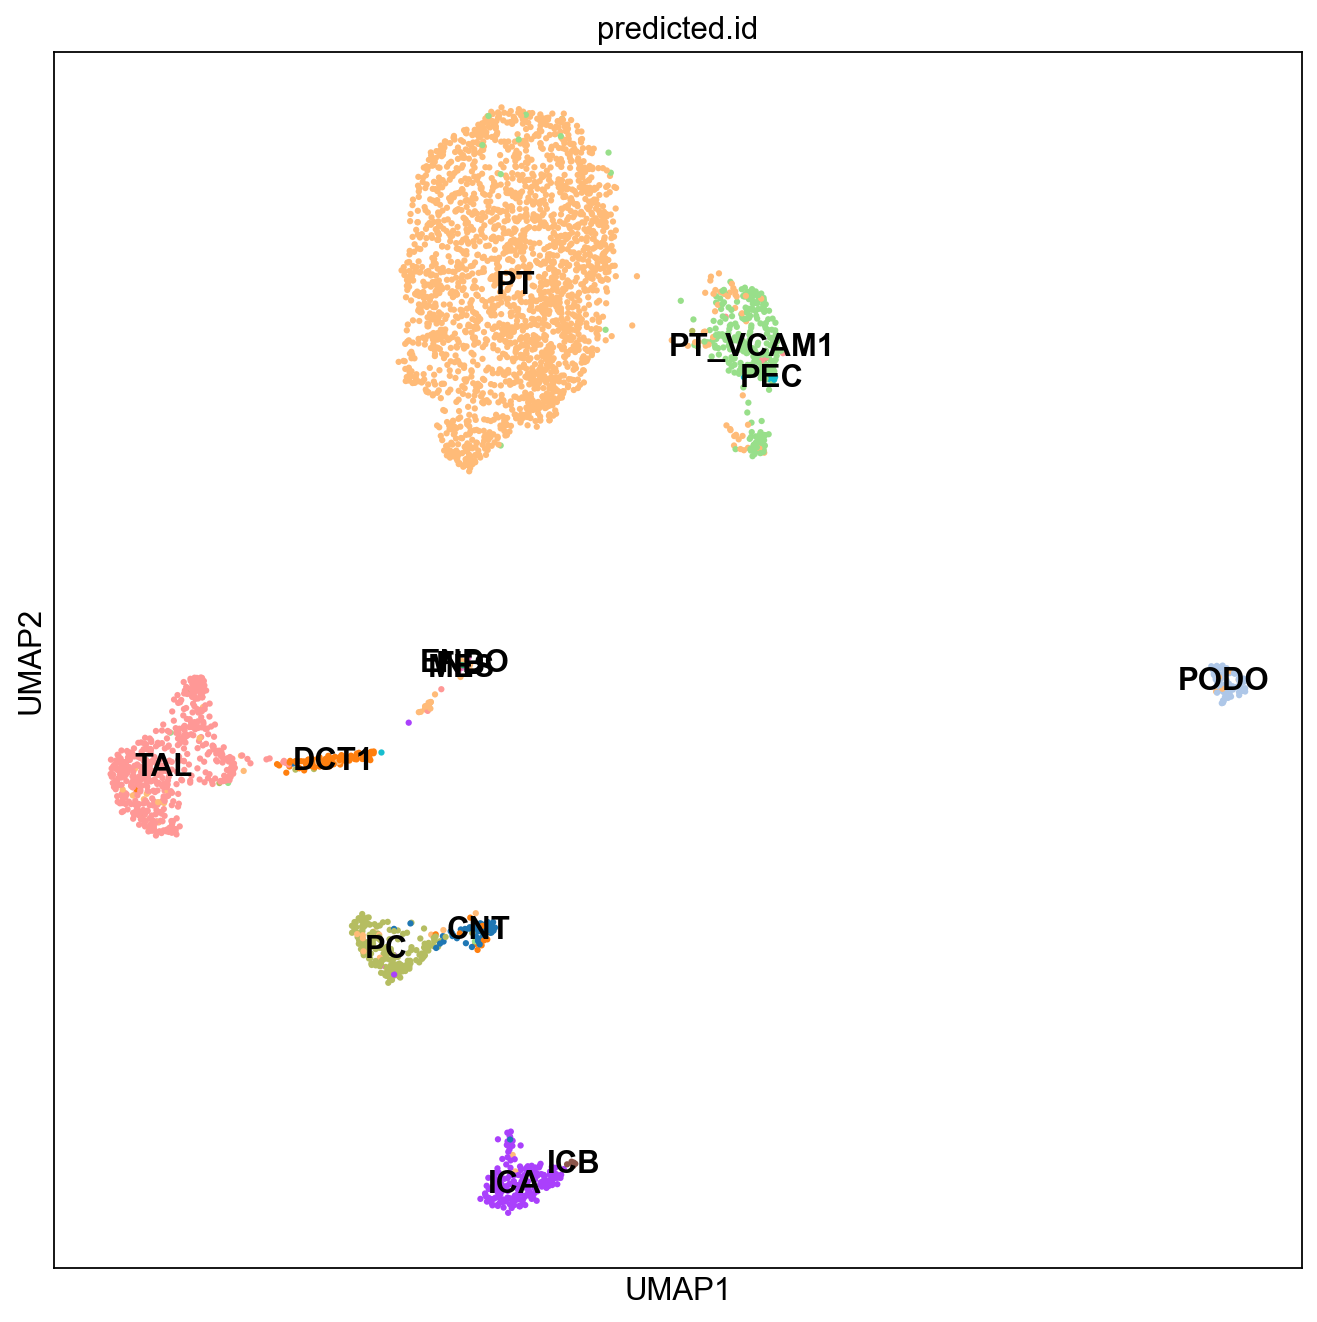

AnnData object with n_obs × n_vars = 3243 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'predicted.id', 'peaks_snn_res.0.8', 'seurat_clusters', 'graph_res.0.8', 'SCT.weight', 'peaks.weight', 'peaks_snn_res.0.9', 'peaks_snn_res.0.6', 'subcluster', 'atac_res.0.6', 'rna_res.0.8', 'rna_res.0.6', 'atac_res.0.8', 'rna_res.0.7', 'my_clusters', 'predicted.celltype', 'dataset', 'nCount_geneactivity', 'nFeature_geneactivity', 'my_annotation'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_lsi', 'X_pca', 'X_umap'


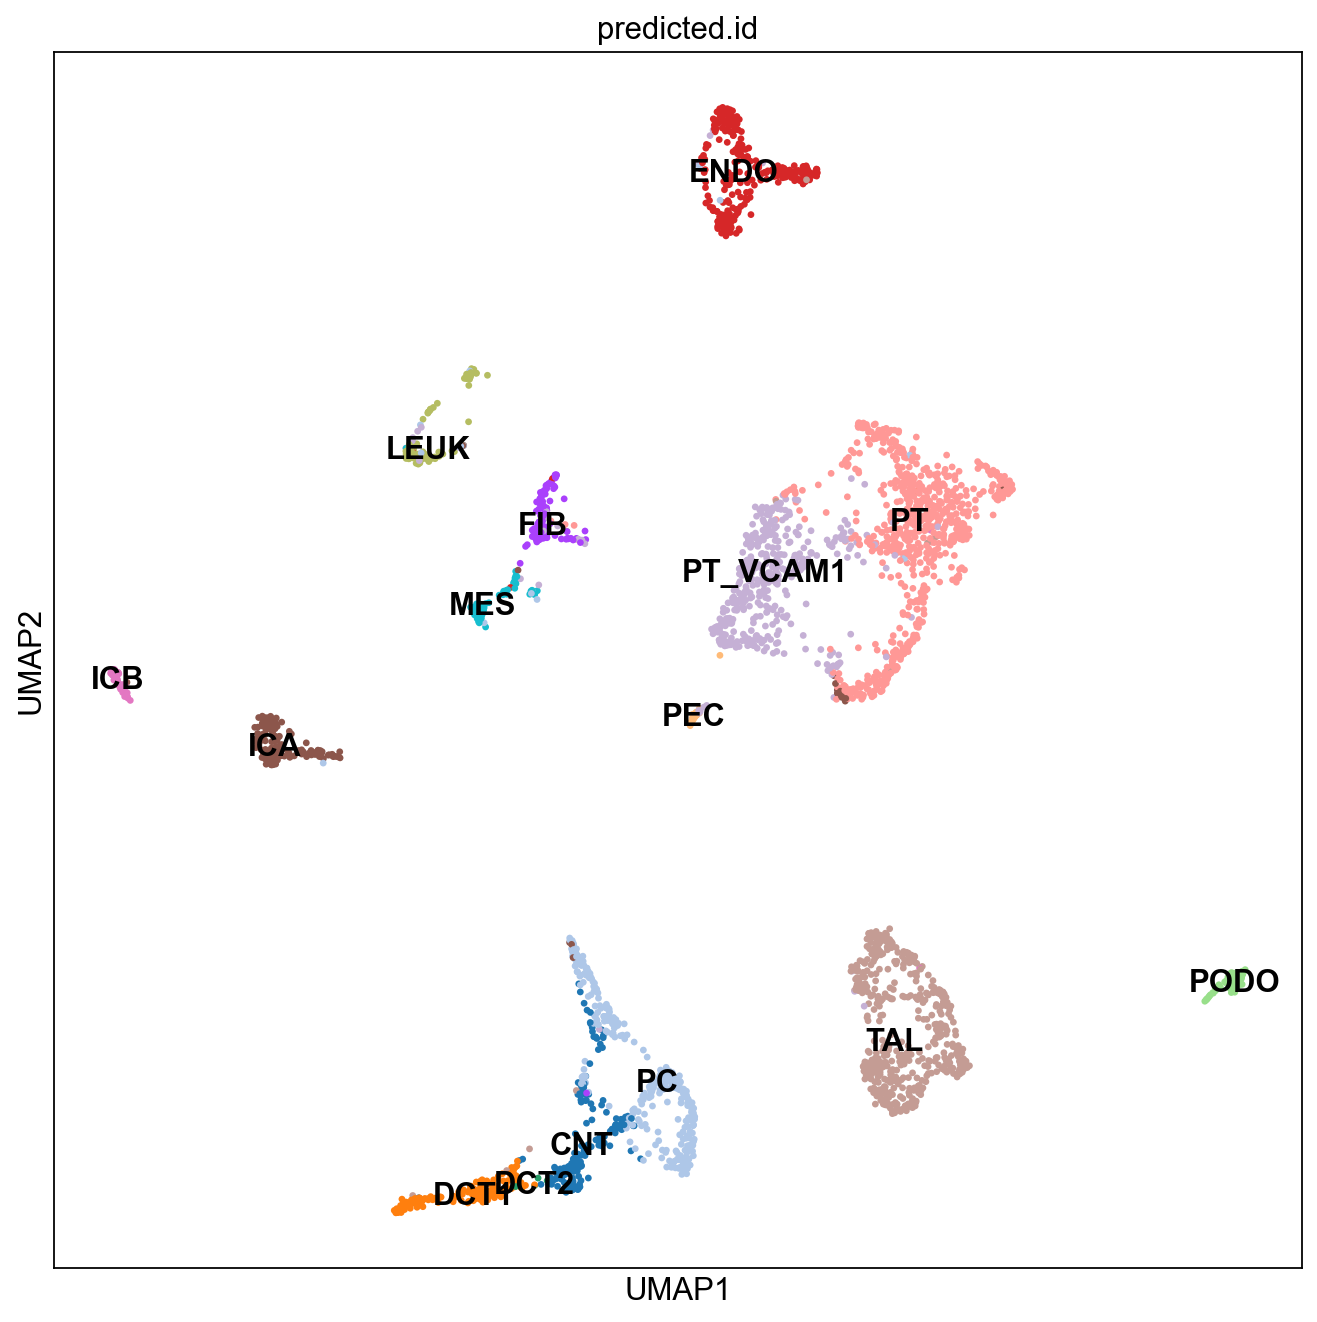

OSError: Unable to open file (unable to open file: name = '/home/pab/projects/kidney/Atac/kidney.atac_peaks.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [20]:
sc.settings.set_figure_params(figsize=('10', '10'), color_map='gist_earth')
# Load and process the reference

rna = ad.read(f"/home/pab/projects/kidney/Nuc/kidney.rna_RNA.h5ad")
print(rna)
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)
sc.pl.umap(rna, color='predicted.id', legend_loc = 'on data')

rna_multi = ad.read(f"/home/pab/projects/kidney/Multi/kidney.multi_RNA.h5ad")
print(rna_multi)
sc.pp.normalize_total(rna_multi, target_sum=1e4)
sc.pp.log1p(rna_multi)
sc.pl.umap(rna_multi, color='predicted.id', legend_loc = 'on data')

atac = ad.read(f"/home/pab/projects/kidney/Atac/kidney.atac_peaks.h5ad")
sc.pp.normalize_total(atac, target_sum=1e4)
sc.pp.log1p(atac)
sc.pl.umap(atac, color='predicted.id', legend_loc = 'on data')

atac_multi = ad.read(f"/home/pab/projects/kidney/Multi/kidney.multi_peaks.h5ad")
sc.pp.normalize_total(atac_multi, target_sum=1e4)
sc.pp.log1p(atac_multi)
sc.pl.umap(atac_multi, color='predicted.id', legend_loc = 'on data')

### Find common features between the two datasets and filter the others:

In [29]:
ref_py, adata = find_common_genes(rna_multi, rna, target_n_genes=3000)

Dimensions before filtering: (3243, 36601) and (3760, 20967)

Looking for 5000 HVG
Found 1298 genes in common
Looking for 6000 HVG
Found 1767 genes in common
Looking for 7000 HVG
Found 2288 genes in common
Looking for 8000 HVG
Found 2952 genes in common
Looking for 9000 HVG
Found 3674 genes in common
Filtering the data to these features and scaling



Dimensions after filtering: (3243, 3674) and (3760, 3674)


### Prepare the reference data and train model:

In [30]:
!rm -r logs/*

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

label_key = "predicted.id"
n_feat = ref_py.shape[1]
n_labs = len(ref_py.obs[label_key ].cat.categories)
ds = DeepScore(hidden_nodes=[512, 128, 64], n_features=n_feat, 
               n_labels=n_labs, batch_size=32, dropout_rate=0.5, 
               epochs=30, weight_reg=True)

ds.set_reference(ref_py, label_by=label_key , test_prop=0.2)
ds.train(earlystopping=True, patience=10, lr_scheduler=scheduler)
ds.model.save('rna_kidney')

rm: cannot remove 'logs/*': No such file or directory
Model: "deepscore"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 3674)              14696     
_________________________________________________________________
dense512 (Dense)             (None, 512)               1881600   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dense128 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
bat

2021-10-22 17:05:42.763211: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-22 17:05:42.763244: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-10-22 17:05:42.930805: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-22 17:05:42.934148: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/30
 2/73 [..............................] - ETA: 12s - loss: 3.4343 - categorical_accuracy: 0.0625 

2021-10-22 17:05:43.888538: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-10-22 17:05:43.888561: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


31/73 [===========>..................] - ETA: 0s - loss: 2.8469 - categorical_accuracy: 0.1562

2021-10-22 17:05:44.114391: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-10-22 17:05:44.116035: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2021-10-22 17:05:44.143207: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 288 callback api events and 285 activity events. 
2021-10-22 17:05:44.149959: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-10-22 17:05:44.158238: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./deepscore_logs/train/plugins/profile/2021_10_22_17_05_44

2021-10-22 17:05:44.163130: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./deepscore_logs/train/plugins/profile/2021_10_22_17_05_44/kino.trace.json.gz
2021-10-22 17:05:44.174443: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory:

73/73 [==============================] - 2s 10ms/step - loss: 2.3785 - categorical_accuracy: 0.2918 - val_loss: 0.7516 - val_categorical_accuracy: 0.7846
Epoch 2/30
73/73 [==============================] - 0s 4ms/step - loss: 1.3291 - categorical_accuracy: 0.6268 - val_loss: 0.4966 - val_categorical_accuracy: 0.8692
Epoch 3/30
73/73 [==============================] - 0s 4ms/step - loss: 0.9964 - categorical_accuracy: 0.7254 - val_loss: 0.3961 - val_categorical_accuracy: 0.8885
Epoch 4/30
73/73 [==============================] - 0s 4ms/step - loss: 0.7976 - categorical_accuracy: 0.7836 - val_loss: 0.3534 - val_categorical_accuracy: 0.8923
Epoch 5/30
73/73 [==============================] - 0s 4ms/step - loss: 0.6532 - categorical_accuracy: 0.8213 - val_loss: 0.3377 - val_categorical_accuracy: 0.8808
Epoch 6/30
73/73 [==============================] - 0s 4ms/step - loss: 0.5574 - categorical_accuracy: 0.8479 - val_loss: 0.3206 - val_categorical_accuracy: 0.8846
Epoch 7/30
73/73 [========

### Predict the celltypes in our sample using the trained model:

... storing 'Deepscore' as categorical


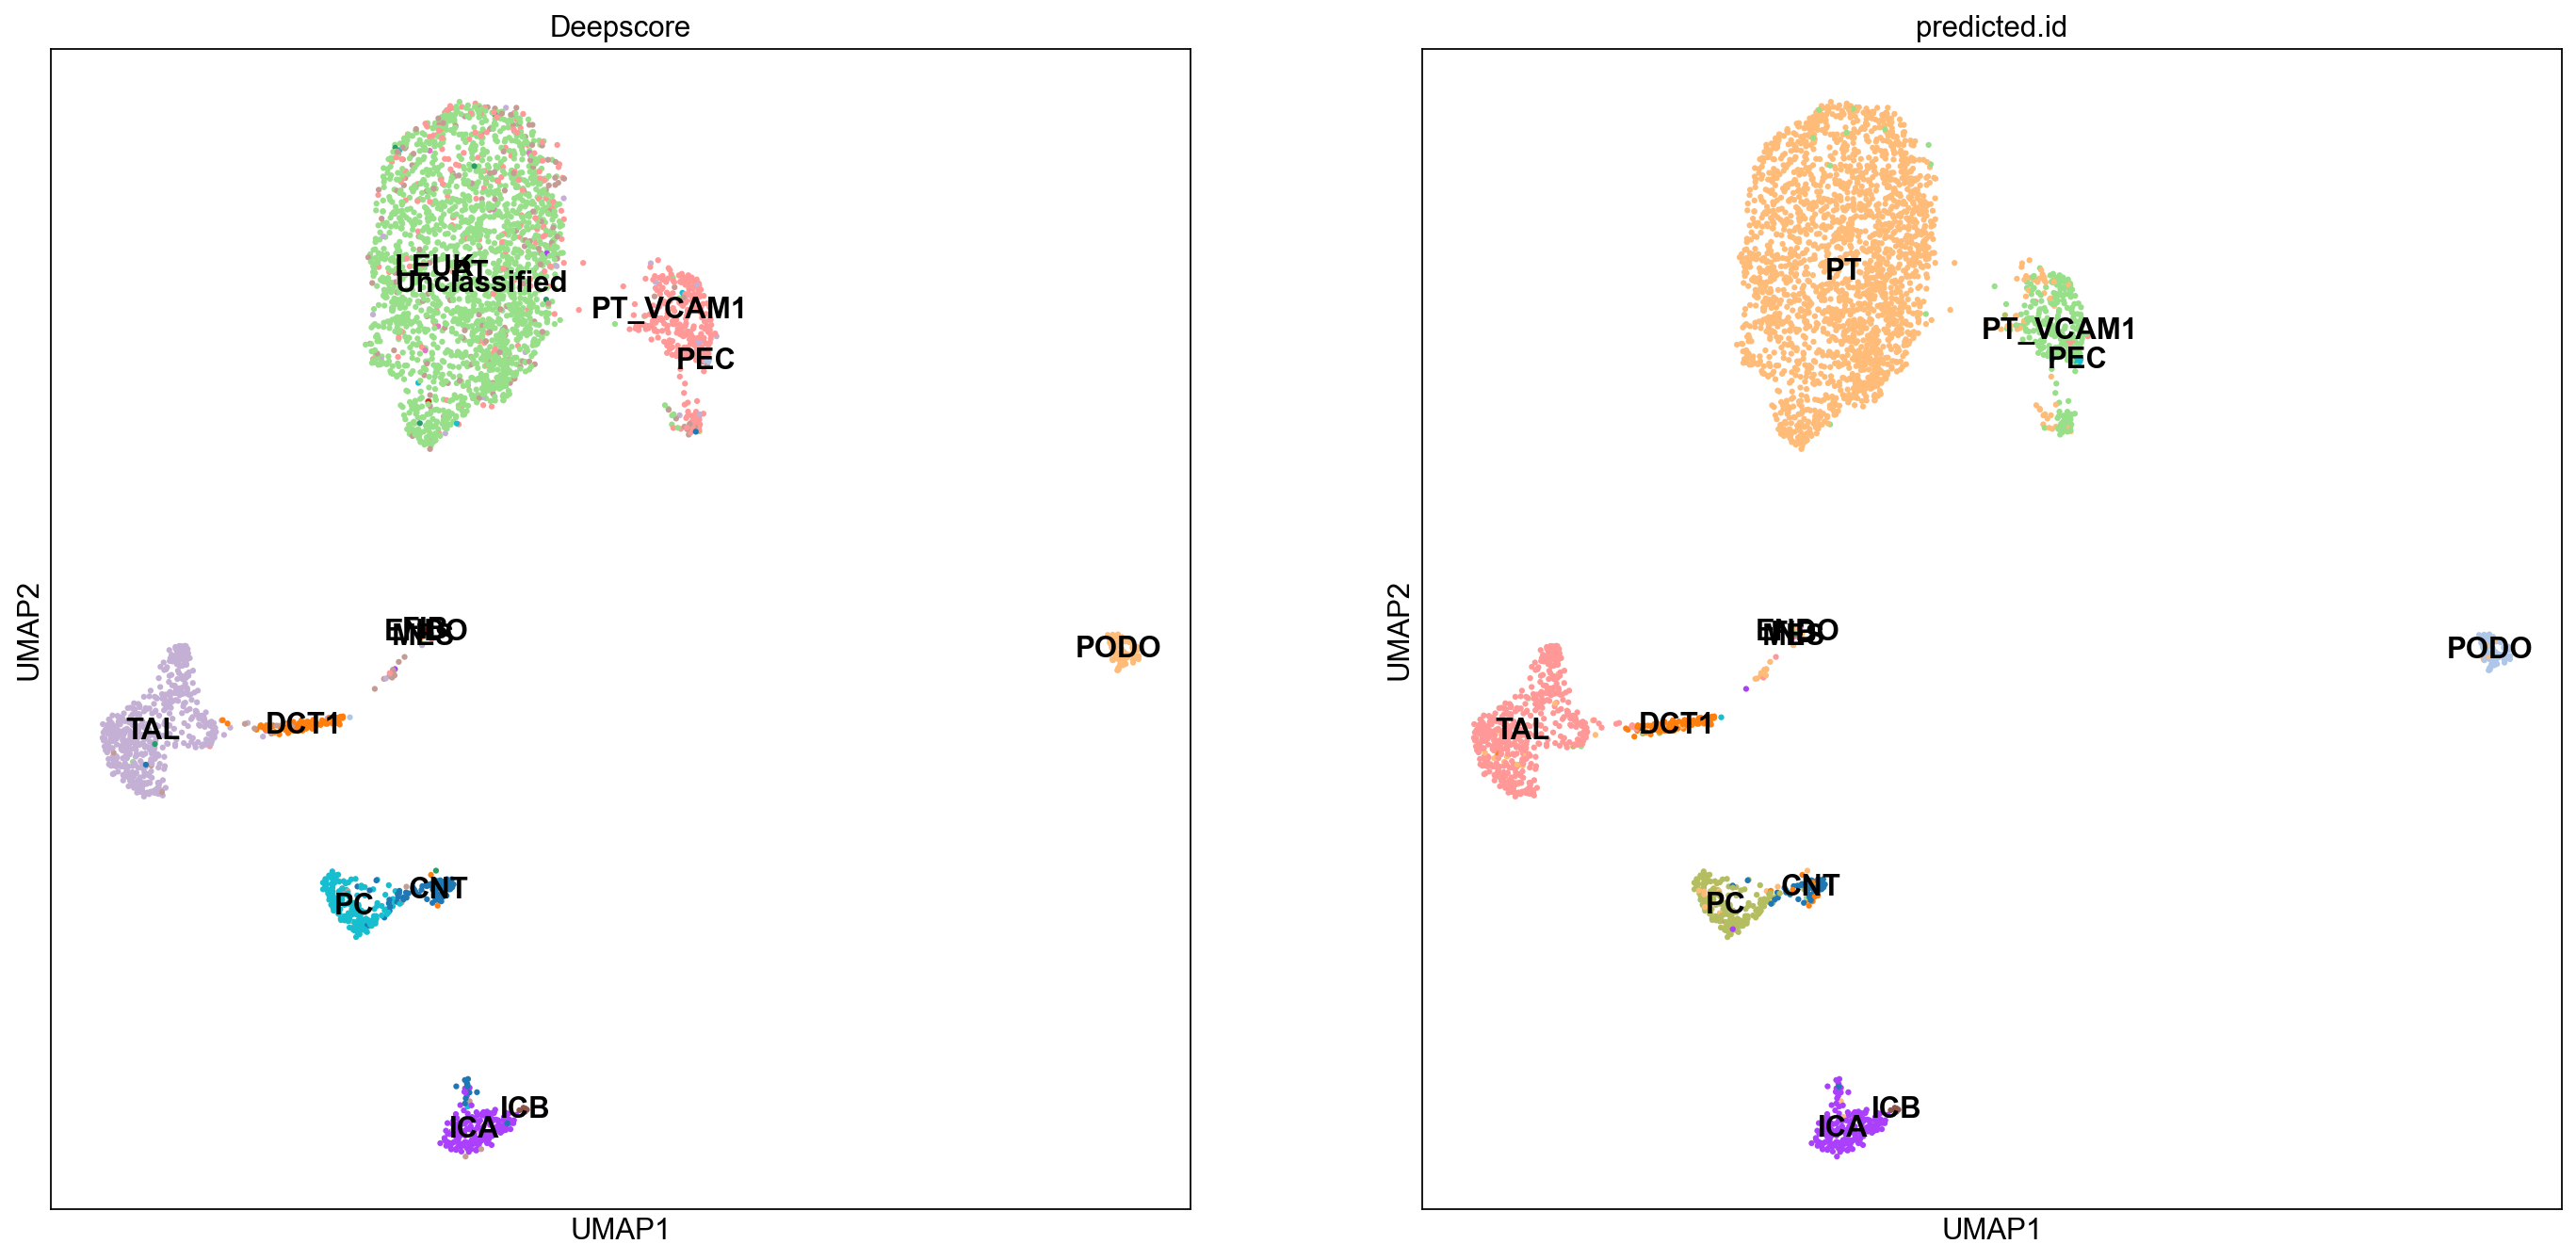

In [31]:
adata = ds.annotate(adata)
sc.pl.umap(adata, color=['Deepscore', 'predicted.id'], legend_loc='on data')

In [10]:
%tensorboard --logdir deepscore_logs

In [32]:
sc.tl.rank_genes_groups(ref_py, 'predicted.id', method='logreg')
sc.tl.rank_genes_groups(adata, 'Deepscore', method='logreg')

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [33]:
ref_markers = top_markers(ref_py, ntop=100)
sample_markers = top_markers(adata, ntop=100)
ref_markers.head(5), sample_markers.head(5)

(          CNT        DCT1        DCT2    ENDO       FIB         ICA       ICB  \
 0   LINC01099     SLC12A3   LINC01828  SHANK3        C7        APOE    SLC4A9   
 1      SLC8A1  AL355612.1       TRPM6    EMCN     SVEP1     C5orf67   SLC26A4   
 2       CALB1     TMEM52B   LINC01896     TEK  CRISPLD2        CLNK       CA8   
 3  AC019197.1    ADAMTS17      SLC8A1    XAF1    ATRNL1     SLC26A7     INSRR   
 4       RUNX1       SALL3  SLC8A1-AS1  ADGRL4     ABCC9  AL139317.5  ADAMTSL3   
 
        LEUK      MES          PC        PEC       PODO          PT  \
 0     IKZF1  COL25A1      PDE10A  LINC01435      PTPRO  AC096577.1   
 1    TBXAS1    ROBO1        KSR2    ALDH1A2      PTPRQ     RNF212B   
 2  ARHGAP15  PIP5K1B    IL1RAPL2     MGAT4C      NPHS1     SLC22A6   
 3     PRKCB    UNC5C  AC093583.1    SLC4A11      NPHS2      SLC4A4   
 4      AOAH   PDGFRB       GATA3        CFH  LINC02798       ALDOB   
 
      PT_VCAM1        TAL  
 0        RHEX    SLC12A1  
 1       ALPK2       C

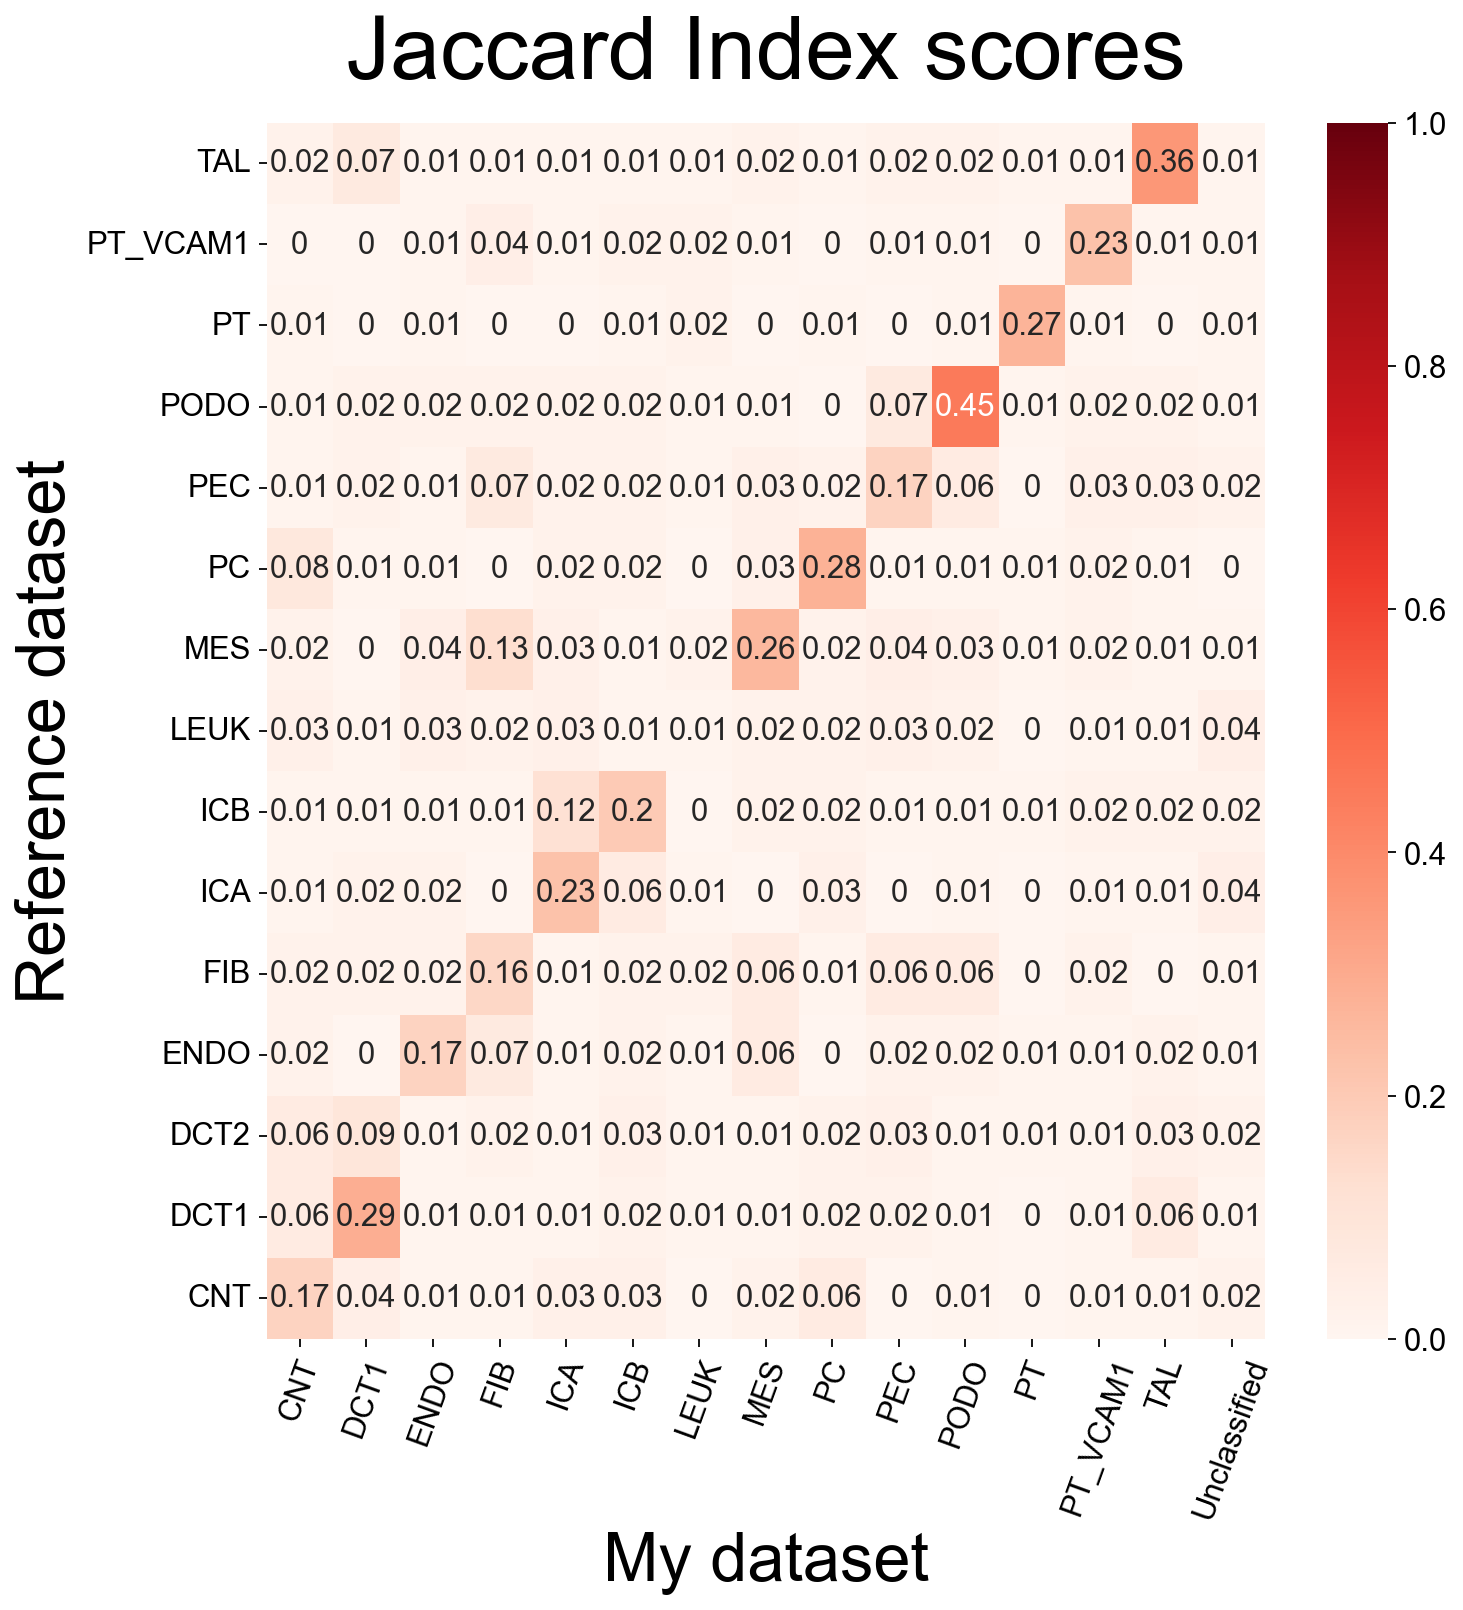

In [34]:
ms = matchscore(ref_markers, sample_markers, plot=True)